<a href="https://www.kaggle.com/code/aileenliu54/aoe-bme-assignment1?scriptVersionId=108183247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Aileen Liu - aml2377

## Art of Engineering
## Biomedical Engineering Departmental Project

### <span style="color:red">Assignment 1</span> - Python, Image visualization and manipulation

#### Due date/time: <span style="color:red">October 21, 2022, 5pm</span>

#### Instructions:
1. You may use any publicly available resources to answer the questions, but you need to ***cite*** them properly to prevent plagiarism. 
2. Using or copying other students' solutions is considered cheating, and you'll be graded ***"0" for the entire assignment***.
3. You may be asked to write Python code or to explain something in each question. To write your answers, please use code and markdown blocks, respectively. If you need to better organize your answers, you may add more blocks. In this notebook, we placed a code block with a comment as `# [Your code here]` and a markdown block with the text "<span style="color:red">Your answer here</span>" for each question that needs them. If you wish to answer, please remove the comments first.
4. Please ***use comments at the beginning of each code blocks*** to explain what you've implemented in that block.
5. Please ***use LaTex formatting to write equations and formulas*** in markdown blocks wherever is needed.
6. Please define your variables with ***short and meaningful names***.
7. Please make sure ***internet access is granted*** on the settings panel.
8. For this assignment, you ***do not need GPU access***. To save your GPU access quote, make sure the "Accelerator" is set on "None" option.

#### How to submit:
Kaggle automatically saves the notebook after few seconds, and you may close the notebook and come back later to complete it. However, we need you to do the following steps to ensure your answers are visible to us for grading purposes. Thus, after you finished your answers, please:
1. Rename the notebook as "AoE_BME_Assignment1".
2. Click on the "Save Version" button on the top-right side of the window.
3. On the save popup, save your notebook with:
    3.1 If the scripts run fast, the "Save & Run All (Commit)" option,
    3.2 If the scripts run slow, such as training networks, etc., and you are satisfied with the outputs of code blocks, "Quick Save" option.
4. Click on the "Save" button and let the Kaggle saves your notebook.
5. Then click on the "Share" button.
6. <span style="color:red">**On the share popup, change "Private" to "Public"**.</span> 
7. Copy the "Public url", and click on the "Save" button.
8. Paste the "Public url" address on the related assignment on the [CourseWorks](https://courseworks2.columbia.edu/) and submit it.

**Note:**
1. You may save multiple versions of your notebook, but the latest version is considered as your final answer.
2. If you wish us to grade your answers based on a different version of your notebook other than the latest version, please duplicate this template, copy your answers from your desired version, and follow the same procedure to submit. Again, make sure the name of the notebook remains as the current template.
3. Do not change or save the notebook after the due date/time as it will be considered a late submission and causes a decrease in your final grade.

#### <span style="color:red">(0 pts.) Q0. </span> The following packages need to be imported. In the parenthesis, you are suggested to rename them accordingly.
1. `numpy` (`np`)
2. `matplotlib.pyplot` (`plt`)
3. `cv2`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Python section

#### <span style="color:red">(8 pts.) Q1. </span> 
#### a. Define the following variables and print their value and data type.
1. variable "a" with a value as 15
2. variable "b" with a value as 7.654
3. variable "c" with a value as 'Image 1'
4. variable "d" with a value as a random numpy array between 0 to 255 with a shape of 128x128 and datatype 'uint8'

In [2]:
a = 15
b = 7.654
c = "Image 1"
d = np.random.randint(low = 0, high = 255, size = (128,128), dtype = "uint8")

#### b. Convert the datatype of variable "d" to 'float' and scale its values to be between 0 to 1. Then print the minimum, maximum, variance, shape, and datatype of the converted version of variable "d".

In [3]:
d = d.astype(float)/255
print ("min: {}, max {}".format(d.min(), d.max()))
print ("shape: {}".format(d.shape))
print ("datatype: {}".format(d.dtype))

min: 0.0, max 0.996078431372549
shape: (128, 128)
datatype: float64


#### <span style="color:red">(15 pts.) Q2. </span> Using only Python commands, write a function named `get_histogram(array)` that takes any numpy arrays with a shape of `WxH` and returns a tuple of two items (i.e., `tuple(edge, histogram)`). Both items in the returned tuple must be numpy arrays with a shape of `(100,)` and their datatypes must be`float` and `int`, respectively. In the `edge` item, you need to set the value for the center of each histogram bin for 100 bins (For example, if the input array values are between 0 and 100, the edges must be `[0.5, 1.5, 2.5, ..., 99.5]`, representing values between `[0, 1), [1, 2), [2, 3), ..., [99 100]`). For the `histogram` item, the array must contain the total number of cells in the input array that lies in between the mentioned values accordingly. Execute your defined function on the converted version of variable "d" and print the output.

In [4]:
def get_histogram(array):
    """
     input: numpy array with shape WxH
     
     returns tuple(edge, histogram)
     edge -> 
         numpy array w/ dtype float, shape (100,)
         center of each of 100 bins
     histogram ->
         numpy array w/ dtype int, shape(100,)
         contains total num of cells in input array in each bin
     """    
    
    #get some basic info about input array (is this allowed??)
    width, height = array.shape
    min = array.min()
    max = array.max()
    
    #calculate step size for 100 bins, then create list of bin edges
    step = (max - min)/100
    bins = [min + step * x for x in range (101)]
    
    #count number of elements in input array that appear in each bin
    count = [] #empty list that will contain ^that info
    for i in range (len(bins) - 1): #iterate through bins (from the left side)
        element_count = 0 #reset element_count for each bin
        for j in range(width): # iterate through each dimension of input array
            for k in array[j]: #iterate within each dimension of input array
                if (k >= bins[i] and k < bins[i+1]): #check values within the bounds of each bin edge
                    element_count += 1
                if (i == 99 and k == bins[i+1]): #if it's the last bin, needs to be inclusive of top value
                    element_count +=1
        count.append(element_count)
        
    #create and return numpy arrays
    edge = np.array([(2 * min + step)/2 + step * x for x in range (100)])
    histogram = np.array(count)
    return (edge, histogram)

print (get_histogram(d))

(array([0.00498039, 0.01494118, 0.02490196, 0.03486275, 0.04482353,
       0.05478431, 0.0647451 , 0.07470588, 0.08466667, 0.09462745,
       0.10458824, 0.11454902, 0.1245098 , 0.13447059, 0.14443137,
       0.15439216, 0.16435294, 0.17431373, 0.18427451, 0.19423529,
       0.20419608, 0.21415686, 0.22411765, 0.23407843, 0.24403922,
       0.254     , 0.26396078, 0.27392157, 0.28388235, 0.29384314,
       0.30380392, 0.31376471, 0.32372549, 0.33368627, 0.34364706,
       0.35360784, 0.36356863, 0.37352941, 0.3834902 , 0.39345098,
       0.40341176, 0.41337255, 0.42333333, 0.43329412, 0.4432549 ,
       0.45321569, 0.46317647, 0.47313725, 0.48309804, 0.49305882,
       0.50301961, 0.51298039, 0.52294118, 0.53290196, 0.54286275,
       0.55282353, 0.56278431, 0.5727451 , 0.58270588, 0.59266667,
       0.60262745, 0.61258824, 0.62254902, 0.6325098 , 0.64247059,
       0.65243137, 0.66239216, 0.67235294, 0.68231373, 0.69227451,
       0.70223529, 0.71219608, 0.72215686, 0.73211765, 0.7420

In [5]:
# help(np.histogram)

#ignore

# def get_histogram(array):
#     # uses numpy commands
#     # just to check work
    
#     hist, edge = np.histogram(array, 100)
#     edge = (edge[:-1] + edge[1:])/2 
#     print (edge.shape, hist.shape)
#     return (edge, hist)

# print (get_histogram(d))



#find min/max (forgot we could just use .min() and .max())
# min = array[0][0] #start by setting both values to the first value in "array"
# max = array[0][0]
# for i in range(width): #iterate through each dimension of "array" 
#     for j in array[i]: #iterate within each dimension 
#         if (j < min): min = j
#         if (j > max): max = j 

* Hint: The sum of `histogram` must be exactly equal to `W*H`.

#### <span style="color:red">(10 pts.) Q3. </span> Using the `bar` function of the `plt` package, write a function named `plot_histogram(array)` that takes any numpy array with a shape of `WxH`, and displays the histogram of the input array. You may use your previously defined function or numpy functions to calculate the histogram. Also, make sure to set title, x and y axes' labels, and legend for your plot. Then try your function on converted version of the "d" variable.

Note: You can add an arbitrary argument for the function to set the title and color. It will be helpful in the future.

In [6]:
# help (plt.bar)
# help (plt.legend)

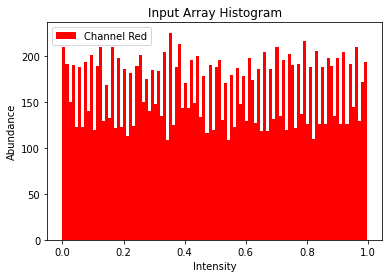

In [7]:
def plot_histogram(array, title = "Input Array Histogram", c = "Red"):
    """
    input: array with shape WxH
    displays histogram of input array
        + title, x- and y-axes labels, legend
    """
    
    #use previously defined function to get frequency and value of bin edges
    hist_values = (get_histogram(array))
    
    #display histogram
    plt.bar(hist_values[0], hist_values[1], 1/100, color = c, label = "Channel {}".format(c))
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Abundance")
    plt.legend()
    
plot_histogram(d)

#### <span style="color:red">(2 pts.) Q4. </span> Download the images from the following address using the `wget` bash command and make sure it is downloaded correctly using the `ls` command.

Image address: https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample.png

True mask address: https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample_mask.png

In [8]:
# !wget --help

In [9]:
!wget -O cell_sample.png https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample.png
!wget -O cell_sample_mask.png https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample_mask.png
!ls

--2022-10-15 15:31:04--  https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177067 (173K) [image/png]
Saving to: ‘cell_sample.png’

cell_sample.png     100%[===================>] 172.92K  --.-KB/s    in 0.02s   

2022-10-15 15:31:04 (7.09 MB/s) - ‘cell_sample.png’ saved [177067/177067]

--2022-10-15 15:31:05--  https://raw.githubusercontent.com/soroush361/AoE_BME/main/cell_sample_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6230 (6.1K) [image/png]
S

### Image visualization and manipulation

#### <span style="color:red">(5 pts.) Q5. </span> Read the downloaded image (cell_sample.png) as a color image using OpenCV's functions. Then convert the image from BGR to RGB format, scale all pixels' values to be between 0 and 1, and print the shape of the image, datatype, minimum and maximum value per channel (RGB).

*Note: Make sure the datatype is `float32` and not the `float64`.

In [10]:
# help (cv2.cvtColor)
cell_img = cv2.imread('cell_sample.png')
cell_img = cv2.cvtColor(cell_img, cv2.COLOR_BGR2RGB)
cell_img = cell_img.astype("float32")
cell_img *= 1./255

print ("shape:{}".format(cell_img.shape))
print ("datatype: {}".format(cell_img.dtype))
print ("min: {}, max: {}".format(cell_img.min(), cell_img.max())) 

shape:(256, 256, 3)
datatype: float32
min: 0.0, max: 1.0


#### <span style="color:red">(10 pts.) Q6. </span>  
#### a. Display the image using the `matplotlib` package, and then plot the histogram of the image for each channel (RGB) using your `plot_histogram(array)` function. 

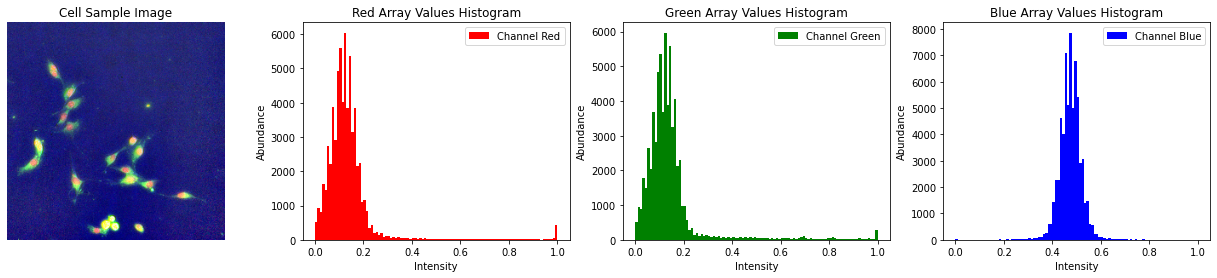

In [11]:
# help(plt.subplot)
# print (dir(plt.figure))
# help(plt.figure)
# help(plt.axis)
# help(plt.plot)
# help(plt.tight_layout)

plt.figure(1, (22,4))

#display image
plt.subplot(1, 4, 1)
plt.title("Cell Sample Image")
plt.imshow(cell_img)
plt.axis("off")

#display histograms
colors = ("Red", "Green", "Blue")
for x in range(len(colors)): #for each color
    plt.subplot(1, 4, x+2)
    plt.title(x)
    plot_histogram(cell_img[:,:,x], f"{colors[x]} Array Values Histogram", colors[x])

#### b. Define a new function as `plot_RGB(array)` in which the function will display the RGB image and the RGB histogram side-by-side. Remember that the RGB histogram must be in one plot. You can use `plot` function instead of `bar` function in `matplotlib` package. Then display the image using the `plot_RGB(array)` function.

In [12]:
# help(plt.plot)
# help (plt.imshow)

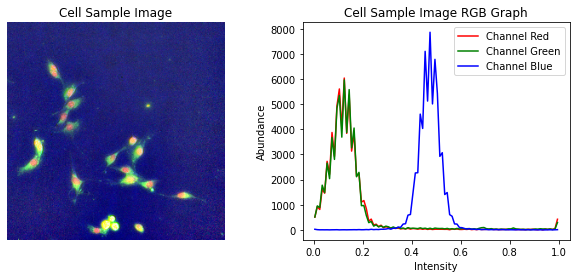

In [13]:
def plot_RGB(array, title):
    plt.figure(figsize = (22, 4))
    
    #show image
    plt.subplot(1, 4, 1)
    plt.title(title)
    plt.imshow(array)
    plt.axis("off")
    
    #show histogram
    plt.subplot(1, 4, 2)
    plt.title(f"{title} RGB Graph")
    plt.xlabel("Intensity")
    plt.ylabel("Abundance")
    
    #get histogram values for each color channel, then plot on same plot
    color = ("Red", "Green", "Blue")
    for i in range(len(color)): 
        hist = get_histogram(array[:,:,i])
        plt.plot(hist[0], hist[1], color = color[i], label = f"Channel {color[i]}")
    plt.legend()
    
    plt.show()
    
plot_RGB(cell_img, "Cell Sample Image")

#### <span style="color:red">(15 pts.) Q7. </span> Define a moving average filter of size $5\times5$. Then, using the `filter2D` function from the OpenCV package, filter the image and print the shape, minimum and maximum value per channel. Also, display the filtered image using the `plot_RGB(array)` function.

In [14]:
# help (np.ones)
# help(cv2.filter2D)
#https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html

Channel Red:
Shape: (256, 256)
Min: 0.007058823946863413, Max: 1.0000001192092896 

Channel Green:
Shape: (256, 256)
Min: 0.005176471080631018, Max: 1.0000001192092896 

Channel Blue:
Shape: (256, 256)
Min: 0.24847060441970825, Max: 0.6970980167388916 



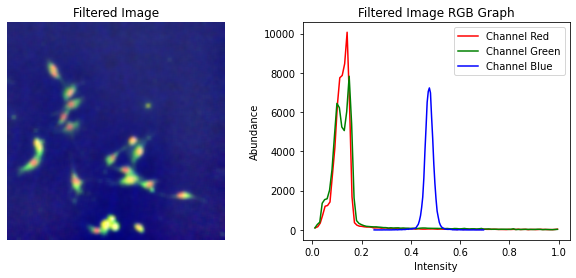

In [15]:
#create moving avg filter with size 5x5, then use to filter image
filter = np.ones((5,5), dtype = np.float32)/25
filtered_img = cv2.filter2D(cell_img, -1, kernel = filter)

#print shape, min, max values per channel
color = ("Red", "Green", "Blue")
for x in range(len(color)):
    print (f"Channel {color[x]}:")
    print (f"Shape: {filtered_img[:,:,x].shape}")
    print ("Min: {}, Max: {} \n".format(filtered_img[:,:,x].min(), filtered_img[:,:,x].max()))
    
#display filtered image using previously defined function
plot_RGB(filtered_img,"Filtered Image")

### Image segmentation

#### <span style="color:red">(5 pts.) Q8. </span> Reload the image from the file (cell_sample.png) using OpenCV functions, but do not scale it (Make sure the datatype remains as `uint8`). Then, convert the BGR image to grayscale and create a binary mask using the OpenCV package's `threshold` function. The threshold value is $127$.

*Note: To make the binary mask, you should consider the following formula:
$$
\forall x, y \quad mask(x,y) = \begin{cases}
1\quad\text{if } gray(x,y) \ge 0.5 \\
0\quad\text{if } gray(x,y) < 0.5 \\
\end{cases}
$$

#### Then, load the ground-truth image (cell_sample_mask.png) and display all grayscale, thresholded, and the ground truth images side-by-side.

(-0.5, 255.5, 255.5, -0.5)

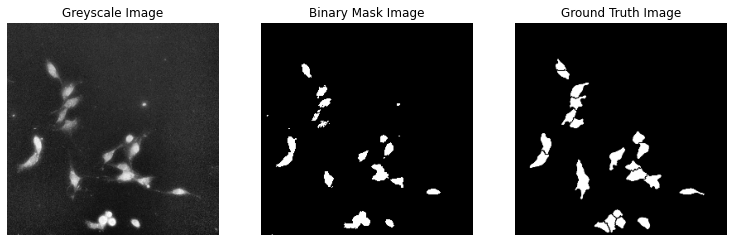

In [16]:
# help(cv2.cvtColor)
# help(plt.imshow)
# help(cv2.threshold)

#load image and convert to greyscale
grey_cell_img = cv2.imread("cell_sample.png")
grey_cell_img = cv2.cvtColor(grey_cell_img, cv2.COLOR_BGR2GRAY)
# print (grey_cell_img.dtype) 

#create binary mask 
ret, binary_mask_img = cv2.threshold(grey_cell_img, 127, 1, cv2.THRESH_BINARY)

#load ground truth image
ground_truth_img = cv2.imread("cell_sample_mask.png")

#display images
plt.figure(figsize = (22,4))

plt.subplot(1, 5, 1)
plt.title ("Greyscale Image")
plt.imshow(grey_cell_img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title("Binary Mask Image")
plt.imshow(binary_mask_img, cmap = "gray", vmin = 0, vmax = 1)
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("Ground Truth Image")
plt.imshow(ground_truth_img)
plt.axis("off")

#### <span style="color:red">(20 pts.) Q9. </span> 
#### a. Read this example of using the OpenCV package for the active contour algorithm for image segmentation: https://learnopencv.com/contour-detection-using-opencv-python-c/. 
#### b. Apply the algorithm on the binary mask you've created by thresholding the grayscale image from the previous question (Q9), draw the contours on a copy of the original image, and display the result.

*Note: The `matplotlib` cannot display BGR images correctly. After drawing the contours, you need to convert the copy image to RGB to be displayed correctly.

In [17]:
# help(cv2.findContours)
# help(cv2.drawContours)

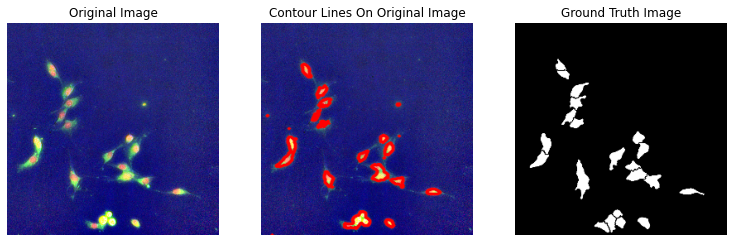

In [18]:
#find contours and draw on copy of original image
contours, hierarchy = cv2.findContours(binary_mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contour_img = cv2.imread('cell_sample.png')
contour_img = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(contour_img, contours, -1, (255, 0,0), 2, cv2.LINE_AA)

#show image
plt.figure(figsize = (22, 4))

plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(cell_img)
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title ("Contour Lines On Original Image")
plt.imshow(contour_img)
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("Ground Truth Image")
plt.imshow(ground_truth_img)
plt.axis("off")

plt.show()

#### <span style="color:red">(10 pts.) Q10. </span> Can you count the number of cells in the image? Did the active contour method extract the correct number of cells? Would you suggest any other preprocessing method to improve the results assuming that the segmentation approach remains the active contour?

I can count 21 cells in the image, which *is* the correct number of cells. However, the "cells" from the contour lines image aren't the same cells as the ones in the ground truth image -- a lot of the ones from the contour lines image are tiny circles that aren't really cells. 

For this specific image, just using the red channel values might be a good way to process the picture. Each cell, as defined by the ground truth image, seems to all have a pretty defined nucleus (or some other structure) in their centers that might be a better distinguishing factor than just light/dark values from the greyscale version of the image.

(-0.5, 255.5, 255.5, -0.5)

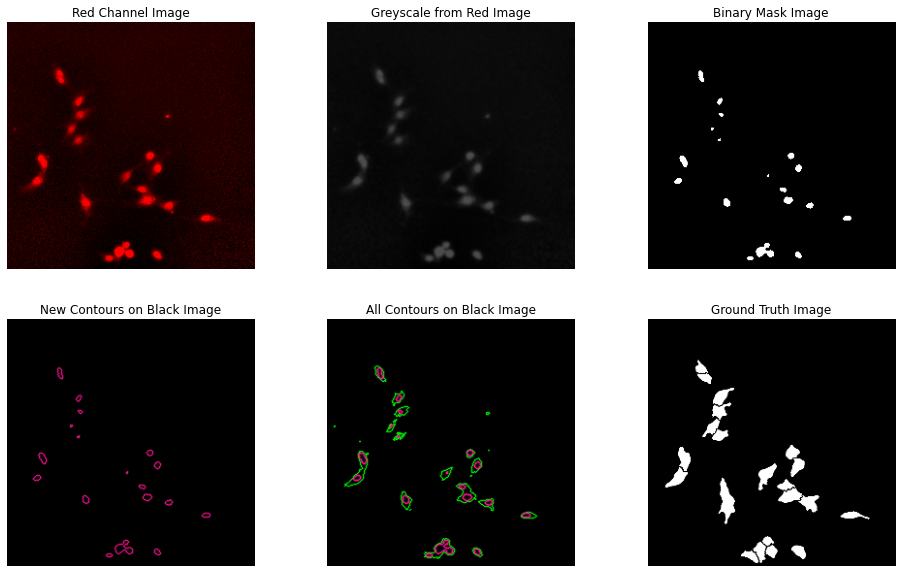

In [19]:
#not necessary, just trying it out
#get original image
original_img = cv2.imread("cell_sample.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

#red channel image
red_img = np.zeros_like(original_img)
red_img[:,:,0] = original_img[:,:,0]
plt.figure(figsize = (22,10))
plt.subplot(2,4,1)
plt.title("Red Channel Image")
plt.imshow(red_img)
plt.axis("off")

#smaller filter to get rid of nnoise but keep outlines between close cells intact
new_filter = np.ones((3, 3), dtype = np.float32)/9
filtered_img = cv2.filter2D(red_img, -1, kernel = new_filter)

#greyscale image from red channel image
grey_img = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2GRAY)
plt.subplot(2,4,2)
plt.title("Greyscale from Red Image")
plt.imshow(grey_img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")

#binary mask from greyscale image
ret, binary_mask = cv2.threshold(grey_img, 59, 1, cv2.THRESH_BINARY)
plt.subplot(2, 4, 3)
plt.title("Binary Mask Image")
plt.imshow(binary_mask, cmap = "gray", vmin = 0, vmax = 1)
plt.axis("off")

#ground truth image for comparison
plt.subplot(2, 4, 7)
plt.title("Ground Truth Image")
plt.imshow(ground_truth_img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")

#find new contours
new_contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#draw contours on black
contours_on_black_img = np.zeros_like(original_img)
cv2.drawContours(contours_on_black_img, new_contours, -1, (255, 20, 147), 1, cv2.LINE_AA) 
plt.subplot(2, 4, 5)
plt.title("New Contours on Black Image")
plt.imshow(contours_on_black_img)
plt.axis("off")

#draw old and new contours to see cells better
cv2.drawContours(contours_on_black_img, contours, -1, (0, 255,0), 1, cv2.LINE_AA)
cv2.drawContours(contours_on_black_img, new_contours, -1, (255, 20, 147), 1, cv2.LINE_AA) 
plt.subplot(2, 4, 6)
plt.title("All Contours on Black Image")
plt.imshow(contours_on_black_img)
plt.axis("off")

#can count 20 cells, just the two in the upper left look like one cell